
<center>

Szymon Sroka 141312

</center>


#   Skąd pochodzi mój zbiór danych?

Zbiór danych, który poniżej będę analizował, wygenerowałem przy pomocy Pythona.
  
Najpierw załadowałem do programu pliki tekstowe z zawartością poszczególnych części "Harry'ego Pottera", podzieliłem tekst na zdania i słowa, a następnie dokonałem analizy takich cech jak ilość słów i ilość znaków w poszczególnych książkach, wydźwięk i obiektywność zdań (przy pomocy pythonowego NLTK) czy częstość występowania słów kluczowych dla tej serii powieści. 
  
Obliczyłem także indeks czytelności Flescha oraz przeanalizowałem wzajemne położenie słów - na przykład czy słowo 'Hermione' pojawiało się statystycznie bliżej słowa 'Harry' niż 'Ron'. Uzyskane dane przeniosłem do arkusza excelowskiego.  

Plik daneliczbowe.csv zawiera podstawowe informacje dotyczące liczby wystąpień słów i znakow, z podziałem na serie, obliczone indeksy czytelności i informacje pochodzące z analizy przy użyciu NLTK. Pozostałe pliki zawierają: najczęściej używane przymiotniki w 1. i 7 części serii (czestotl_przym.csv) i liczbę ich powtórzeń, listę najczęściej używanych używanych słów w całej serii i liczbę ich powtórzeń (czestotl_calosc.csv), liczbę samogłosek w każdym zdaniu serii (samogloski.csv) oraz infrmacje o liczbie liter w zdaniach, ich wydźwięku i obiektywności (dane2.csv).
     
Do analizy użyłem tekstu w języku angielskim, aby móc użyć wspomnianych wyżej bibliotek przetwarzania języka naturalnego, które w większości przypadków są dostępne tylko w języku angielskim.


In [28]:
dane = read.csv("daneliczbowe.csv",row.names=1)
dane[1:7]
options(scipen = 999)

,wykrzyknienia,zn_zapytania,kropki,slowa,znaki,unikalne_slowa,harry
1,474,754,6136,77628,440684,7996,1326
2,535,704,6725,85675,487210,9899,1646
3,1012,1025,9445,104996,610035,10487,2004
4,1461,1746,12458,191632,1099604,14277,3171
5,1567,2595,19115,257306,1494678,17840,4109
6,1066,1760,12072,170679,978749,15233,2795
7,1540,2124,14067,197948,1127105,15990,3146
ALL,7655,10708,80018,1085863,6238087,38806,18197


# Wykresy, chmury słowne, szeregi rozdzielcze i ich analizy 

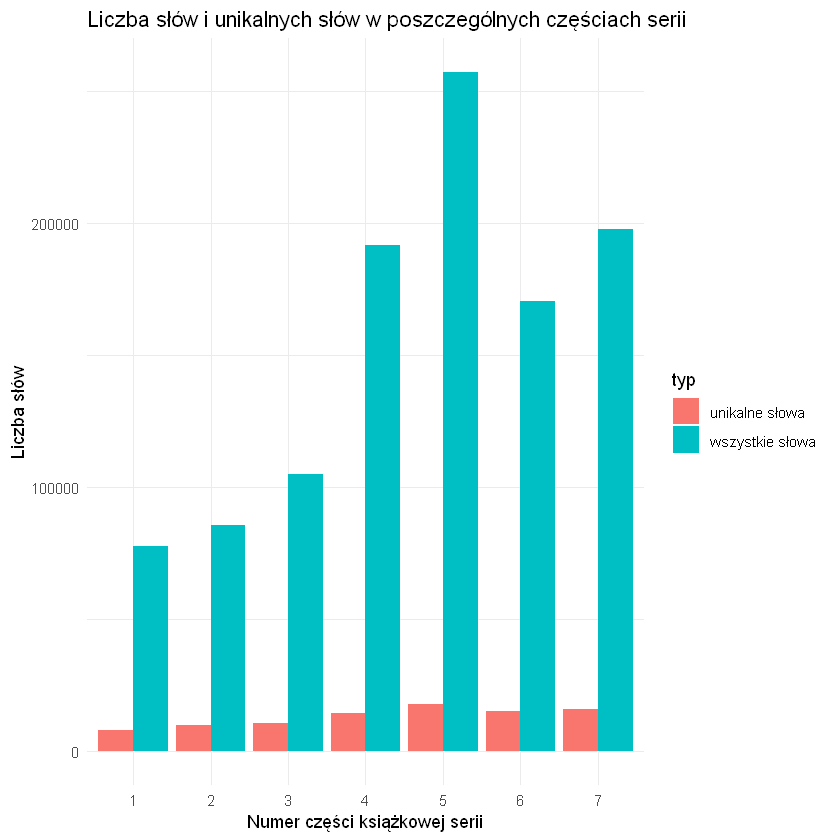

In [29]:
library(ggplot2)

część_powieści <- c(rep("1" , 2) , rep("2" , 2),rep("3" , 2) , rep("4" , 2),rep("5" , 2) , rep("6" , 2),rep("7" , 2))
typ <- rep(c("unikalne słowa" , "wszystkie słowa") , 14)
liczba_słów <- c(rbind(dane$unikalne_slowa[1:7], dane$slowa[1:7]))
data <-  data.frame(część_powieści,typ,liczba_słów)
 
ggplot(data, aes(fill=typ,y=liczba_słów, x=część_powieści)) + ylab("Liczba słów")+xlab("Numer części książkowej serii")+geom_bar(position="dodge", stat="identity")+ggtitle("Liczba słów i unikalnych słów w poszczególnych częściach serii")+
  theme_minimal()

Dane statystyczne liczby **wszystkich i unikalnych słów** w z podziałem na serie:

In [30]:
library(e1071) 
data.frame(Nazwa_badanej_wielkości=c("Średnia arytmetyczna","Wariancja","Odchylenie standardowe","Rozstęp","Mediana","Skośność","Kurtoza"),
           Wszystkie_słowa=c(mean(dane$slowa[1:7]),var(dane$slowa[1:7]),sd(dane$slowa[1:7]),max(dane$slowa)-min(dane$slowa[1:7]),median(dane$slowa[1:7]),skewness(dane$slowa[1:7]),kurtosis(dane$slowa[1:7])),
           Unikalne_słowa=c(mean(dane$unikalne_slowa[1:7]),var(dane$unikalne_slowa[1:7]),sd(dane$unikalne_slowa[1:7]),max(dane$unikalne_slowa)-min(dane$unikalne_slowa[1:7]),median(dane$unikalne_slowa[1:7]),skewness(dane$unikalne_slowa[1:7]),kurtosis(dane$unikalne_slowa[1:7])))

Nazwa_badanej_wielkości,Wszystkie_słowa,Unikalne_słowa
Średnia arytmetyczna,155123.4285714,13103.1428571
Wariancja,4531909697.9523811,13313272.4761905
Odchylenie standardowe,67319.4600242,3648.7357367
Rozstęp,1008235.0000000,30810.0000000
Mediana,170679.0000000,14277.0000000
Skośność,0.1271606,-0.1246549
Kurtoza,-1.7489422,-1.8490797


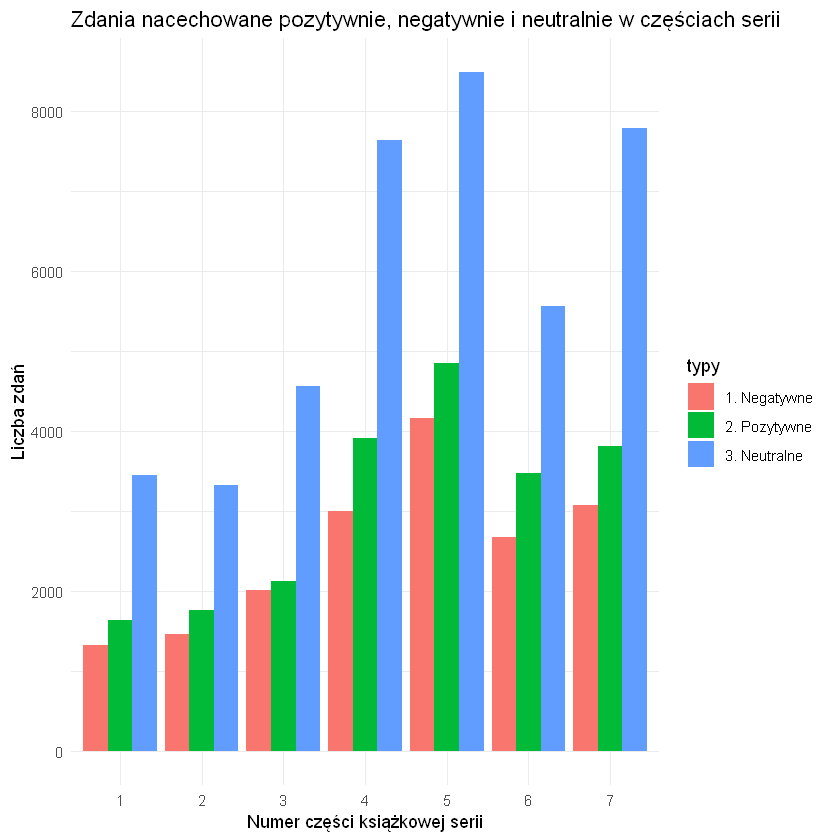

In [31]:
część_powieści1 <- c(rep("1" , 3) , rep("2" , 3),rep("3" , 3) , rep("4" , 3),rep("5" , 3) , rep("6" ,3),rep("7" , 3))

typy <- rep(c("1. Negatywne" ,"3. Neutralne","2. Pozytywne") , 7)

liczba_słów1 <- c(rbind(dane$X.neg[1:7],dane$X.neut[1:7],dane$X.poz[1:7]))
data1 <-  data.frame(część_powieści1,typy,liczba_słów1)
 
ggplot(data1, aes(fill=typy,y=liczba_słów1, x=część_powieści1)) + ylab("Liczba zdań")+xlab("Numer części książkowej serii")+geom_bar(position="dodge", stat="identity")+ggtitle("Zdania nacechowane pozytywnie, negatywnie i neutralnie w częściach serii")+
  theme_minimal()

  
Poniżej prezentuję szeregi rozdzielcze dla długości zdania (liczba znaków włącznie ze znakami interpunkcyjnymi i spacjami) oraz liczby samogłosek w zdaniach.
Zdania dłuższe niż 500 znaków stanowiły zaledwie 0.0009 wszystkich zdań, dlatego dla przejrzystości obliczeń i rysowania odrzuciłem je jako błąd, który mógł wystąpić podczas podziału tekstu na zdania w Pythonie.

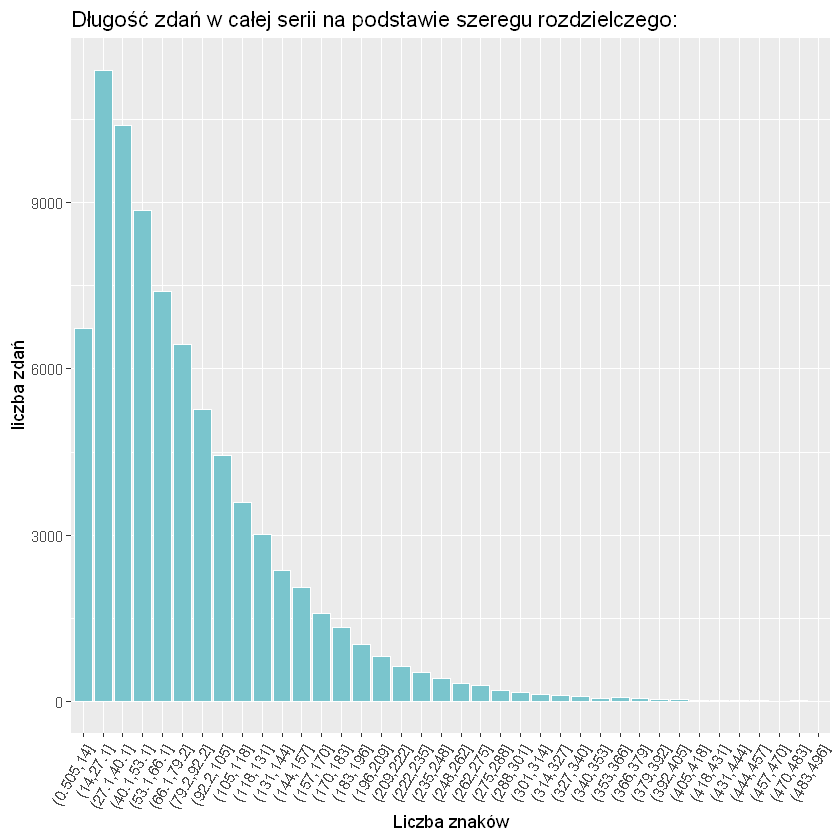

In [32]:
dane2 = read.csv("dane2.csv",col.names=c("id_zdania","dlugosc","wydzwiek","obiektywnosc"),sep=',',head=FALSE)


wektor2=dane2$dlugosc[dane2$dlugosc<500]
k2=(1 + 3.322*log(length(dane2$dlugosc[dane2$dlugosc<500])))
wektor2=cut(wektor2,breaks=k2)
przedzialy2=data.frame(table(wektor2))

p1=ggplot(data=przedzialy2, aes(x=wektor2, y=Freq)) +
  geom_bar(stat="identity",color="white",fill="cadetblue3")+ggtitle("Długość zdań w całej serii na podstawie szeregu rozdzielczego:")+scale_fill_brewer(palette="Dark2")+ylab("liczba zdań")+xlab("Liczba znaków")+theme(axis.text.x = element_text(angle = 60, hjust = 1))

dane_samogl = data.frame(read.csv("samogloski.csv",head=FALSE))


k_samogl=(1 + 3.322*log(nrow(dane_samogl)))

dane_samogl=cut(dane_samogl$V1,breaks=k_samogl)
dane_samogl=data.frame(table(dane_samogl))


p2=ggplot(data=dane_samogl, aes(x=dane_samogl, y=Freq)) +
  geom_bar(stat="identity",color="white",fill="cadetblue3")+ggtitle("Liczba samogłosek w zdaniu na podstawie szeregu rozdzielczego:")+scale_fill_brewer(palette="Dark2")+ylab("liczba zdań")+xlab("Liczba samogłosek")+theme(axis.text.x = element_text(angle = 60, hjust = 1))

p1


In [33]:
data.frame("Nazwa"=c("Średnia arytmetyczna","Wariancja","Odchylenie standardowe","Rozstęp","Mediana"),
           "Wartość dla długości zdań"=c(mean(dane2$dlugosc),var(dane2$dlugosc),sd(dane2$dlugosc),max(dane2$dlugosc)-min(dane2$dlugosc),median(dane2$dlugosc)))




Nazwa,Wartość.dla.długości.zdań
Średnia arytmetyczna,76.06903
Wariancja,4261.83528
Odchylenie standardowe,65.28273
Rozstęp,1031.00000
Mediana,58.00000


\newpage

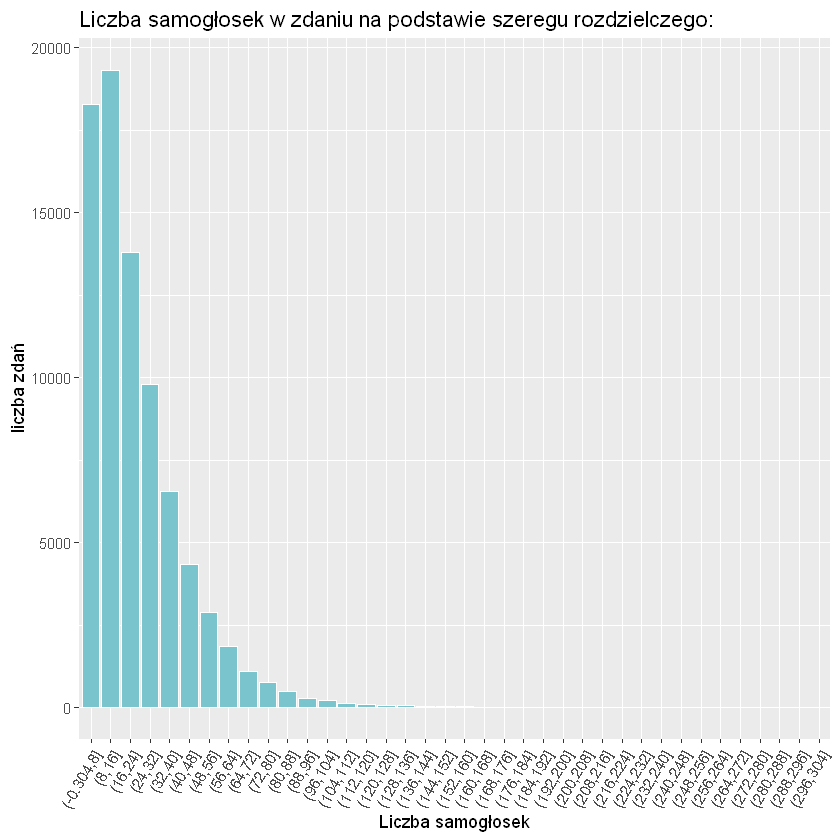

In [34]:
p2


In [35]:
dane_samogl = data.frame(read.csv("samogloski.csv",head=FALSE))

data.frame("Nazwa"=c("Średnia arytmetyczna","Wariancja","Odchylenie standardowe","Rozstęp","Mediana"),
           "Wartość dla liczby samogłosek"=c(mean(dane_samogl$V1),var(dane_samogl$V1),sd(dane_samogl$V1),max(dane_samogl$V1)-min(dane_samogl$V1),median(dane_samogl$V1)))


Nazwa,Wartość.dla.liczby.samogłosek
Średnia arytmetyczna,23.17921
Wariancja,394.98697
Odchylenie standardowe,19.87428
Rozstęp,304.00000
Mediana,18.00000


\newpage
Poniżej przedstawione jest 10 najczęściej występujących wyrazów w całej serii, a w'chmurze słownej' przedstawione jest 100 najczęściej występujących słów z wielkością słowa proporcjonalną do liczby wystąpień.

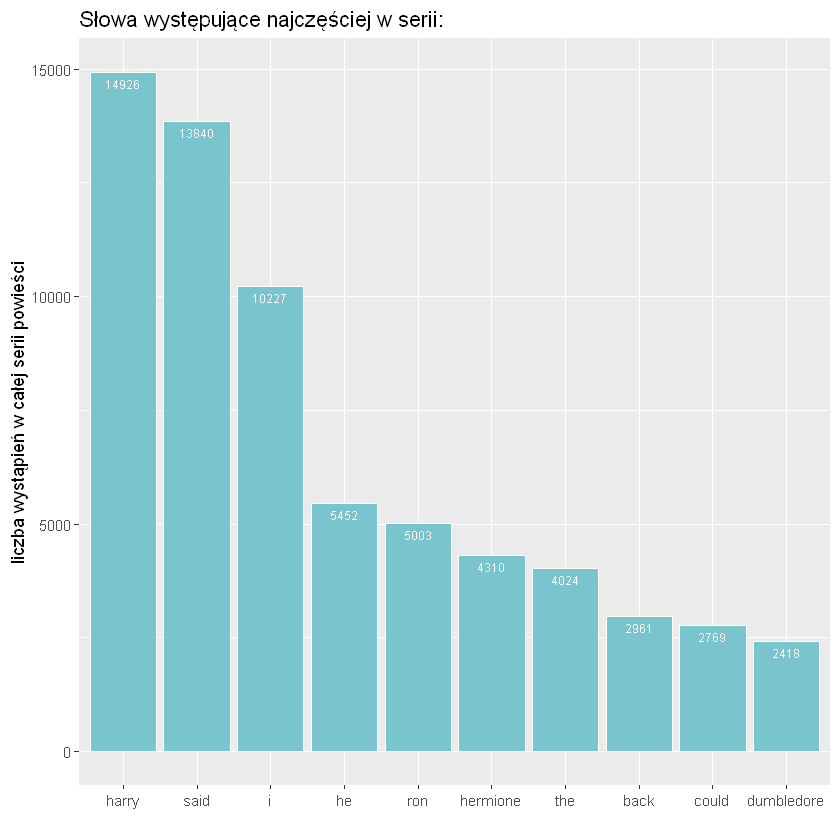

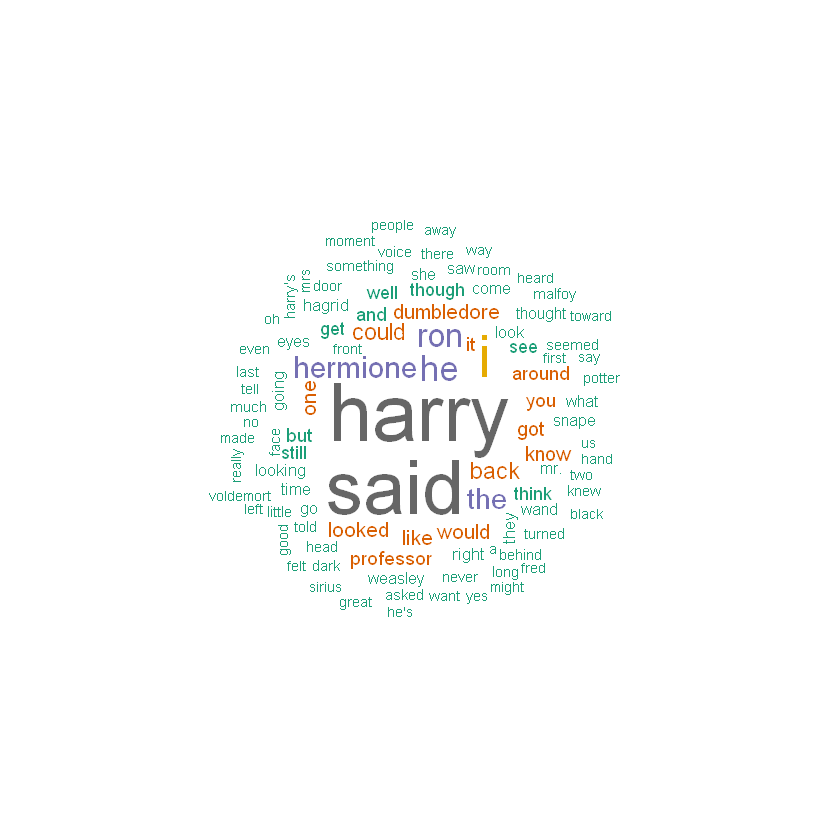

In [36]:
czest = read.csv("czestotl_calosc.csv",sep=' ',head=TRUE)
czest_frame=data.frame(czest$slowo[1:10],names.arg=czest$count[1:10])


ggplot(data=czest_frame, aes(x=reorder(czest.slowo.1.10.,-names.arg), y=names.arg)) +
  geom_bar(stat="identity",color="white",fill="cadetblue3")+ geom_text(aes(label=names.arg), vjust=1.6, color="white",
            position = position_dodge(0.9), size=2.5)+xlab("")+ylab("liczba wystąpień w całej serii powieści")+
        ggtitle("Słowa występujące najczęściej w serii:")

library("wordcloud")
wordcloud(words = czest$slowo, freq = czest$count, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.1, 
          colors=brewer.pal(8, "Dark2"),main="hehe")
     

Na uwagę zasługuje nieco zaskakujący fakt, że słowo *Ron* pojawiło się w książce o prawie 700 razy więcej niż *Hermione*.  Poniżej zamieszczam wykres prezentujący liczbę wspomnień nazw domów w Hogwarcie z podziałem na części serii:

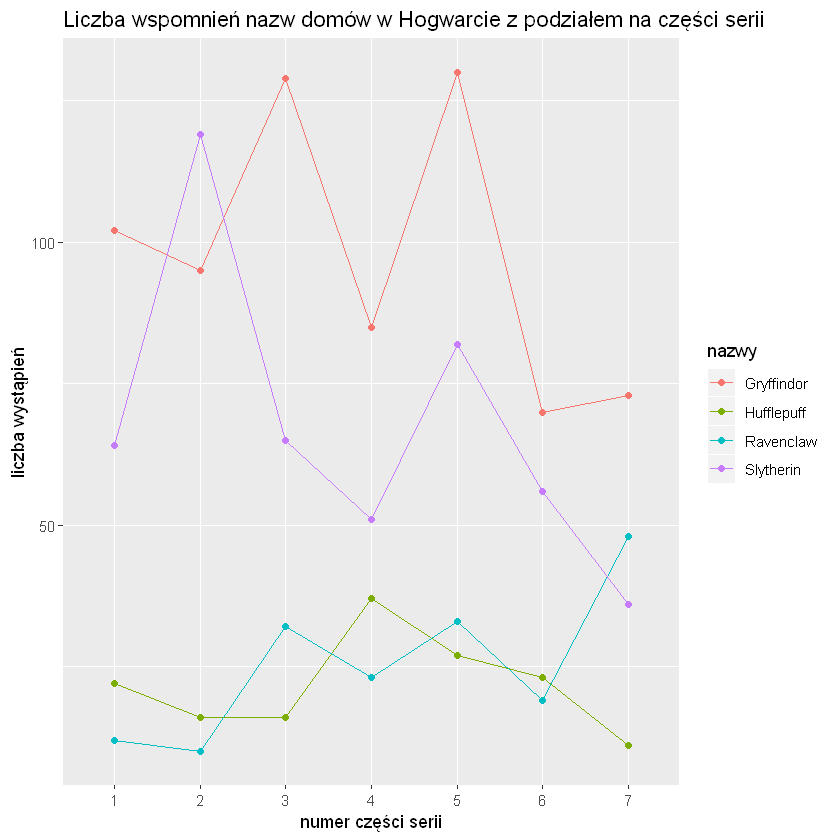

In [37]:
dat <- data.frame(nazwy=rep(c("Gryffindor", "Slytherin","Ravenclaw","Hufflepuff"), each=7),
                dose=rep(c("1","2","3","4","5","6","7"),4),
                len=c(dane$gryffindor[1:7],dane$slytherin[1:7],dane$ravenclaw[1:7],dane$hufflepuff[1:7]))


ggplot(dat, aes(x=dose, y=len, group=nazwy)) +
  geom_line(aes(color=nazwy))+
  geom_point(aes(color=nazwy))+
  xlab("numer części serii")+ylab("liczba wystąpień")+
    ggtitle("Liczba wspomnień nazw domów w Hogwarcie z podziałem na części serii")

Spośród mniej oczywistych wniosków płynących z analizy powyższego wykresu można wymienić relatywnie dużą ilość powtórzeń słowa 'Slytherin' w drugiej części serii. Jest to spowodowane faktem, że centrum akcji tej serii znajduje się Komnata Tajemnic, która mogła być otwarta jedynie przez Dziedzica Slytherina, stąd bardzo często pojawiał się on w treści powieści. Można również zauważyć, że słowo 'Ravenclav' w ostatniej częsci serii pojawiało się znacznie częściej niż w poprzednich - ma to związek z diademem Roweny Ravenclaw, który był jednym z horkruksów, poszukiwanych przez głównych bohaterów w ostatniej części serii.
  
\newpage

Autorka w jednym z wywiadów zdradziła, że jej celem było, aby każda kolejna powieść serii była coraz bardziej mroczna, złożona, i dojrzała. Na podstawie porównania najczęściej używanych przymiotników w pierwszej i ostatniej serii sprawdzę, czy istotnie tak jest.

Chmura słów poniżej prezentuje **najczęściej używane przymiotniki w pierwszej części serii.** Rozmiar słowa odpowiada częstości jego występowania w tekście części.

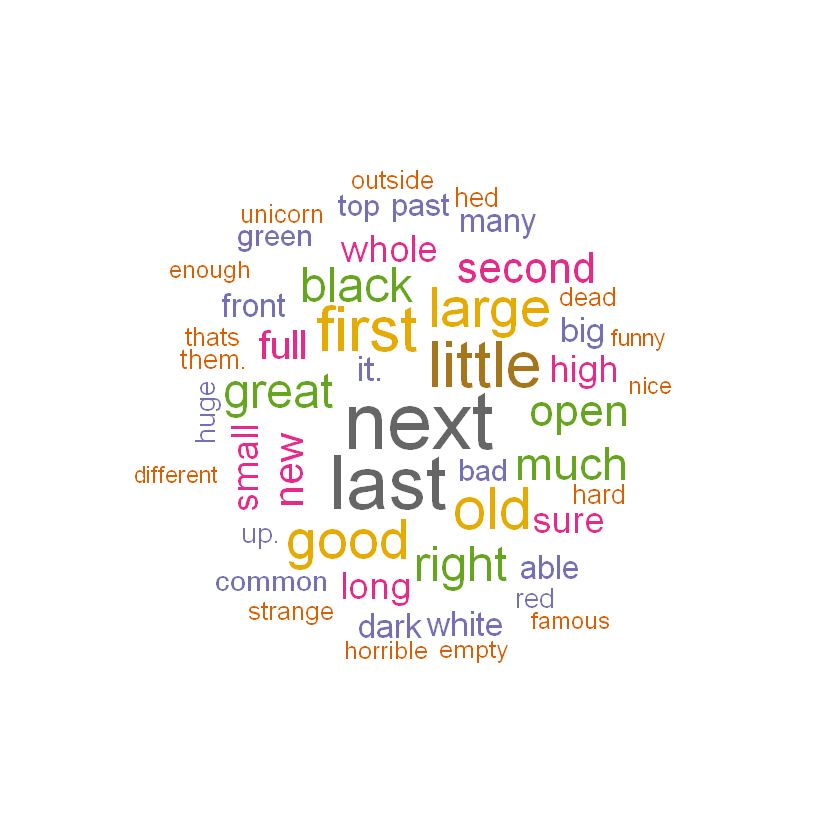

In [38]:
czest17 = read.csv("czestotl_przym.csv",sep=',',head=FALSE)

library("wordcloud")



#png("wordcloud.png", width=500,height=500)
wordcloud(words = czest17$V1, freq = czest17$V2, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.1,
          colors=brewer.pal(8, "Dark2"))
#dev.off()



#library(png)
#img <- readPNG('wordcloud.png')
#grid::grid.raster(img)






\newpage
  
Chmura słów poniżej prezentuje **najczęściej używane przymiotniki w ostatniej, siódmej częśći serii.**

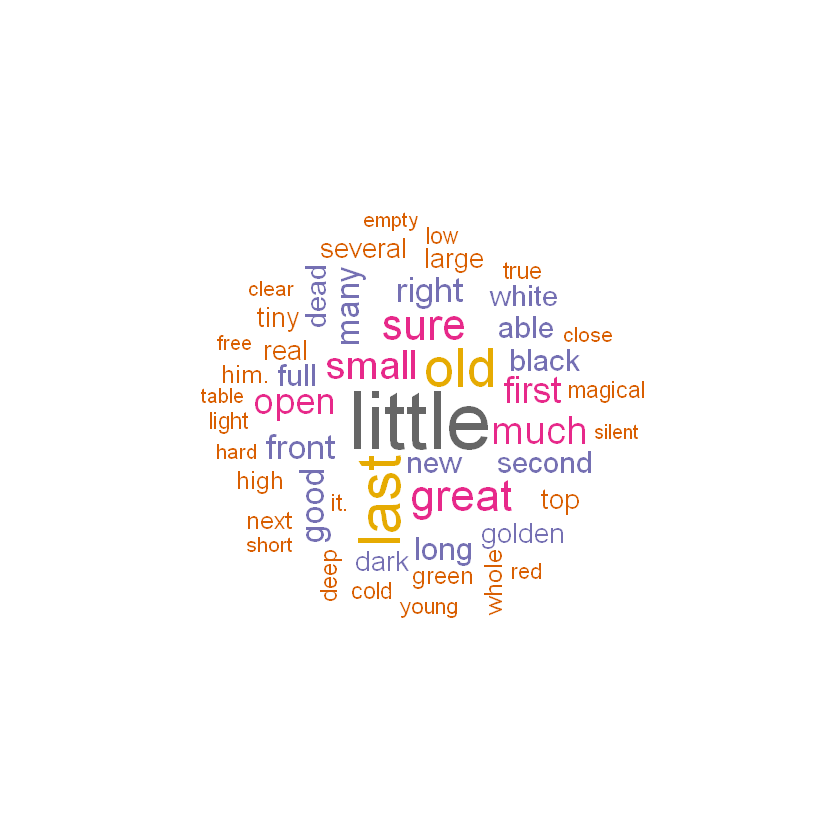

In [39]:
wordcloud(words = czest17$V3, freq = czest17$V4, min.freq = 1,
          max.words=100, random.order=FALSE, rot.per=0.1, colors=brewer.pal(8, "Dark2"))


W pierwszej części istotnie dominują słowa przymiotniki pozytywnie nacechowane: good, right, great, new, funny, top, right, white; natomiast w drugiej części przeważają słowa takie jak: little, last, old, black, small, dark, dead, cold, hard, silent. Stąd można wywnioskować, że rzeczywiście pierwsza część była bajkowa, pogodna, a wraz z rozwojem akcji siódma część stała się tą najbardziej mroczną.
  
\newpage
  
Na koniec przedstawiam wyliczony **wskaźnik czytelności Flescha** dla każdej części serii. Indeks ten określa stopień trudności zrozumienia danego tekstu w języku angielskim. Oblicza się go na podstawie wzoru: 206.835 - 1.015*(liczba_słów/liczba_zdań)-84.6*(liczba_sylab/liczba_słów).

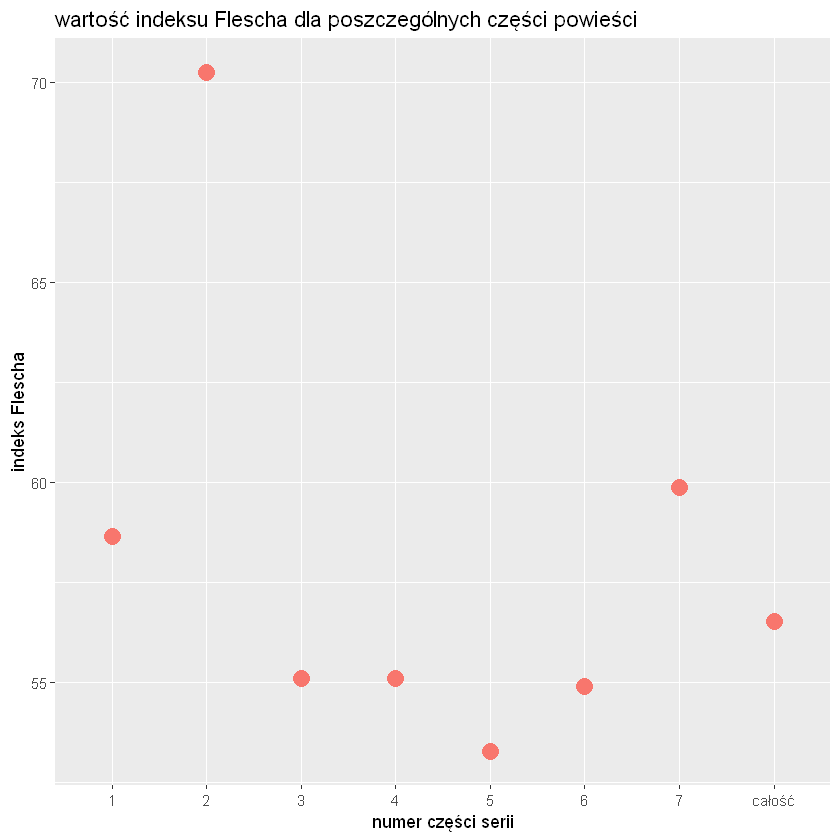

In [40]:
ggplot(data=dane, aes(x=c("1","2","3","4","5","6","7","całość"), y=Flesch)) +
  geom_point(aes(color="red",size=5))+
  xlab("numer części serii")+ylab("indeks Flescha")+ggtitle("wartość indeksu Flescha dla poszczególnych części powieści")+theme(legend.position = "none") 

  
    Zakres punktów oraz odpowiadające mu objaśnienie (źródło -> wikipedia.org):
    
    100.00–90.00	 Very easy to read. Easily understood by an average 11-year-old student.  
    90.0–80.0	    Easy to read. Conversational English for consumers.  
    80.0–70.0	    Fairly easy to read.  
    70.0–60.0	    Plain English. Easily understood by 13- to 15-year-old students.  
    60.0–50.0	    Fairly difficult to read.  
    50.0–30.0	    Difficult to read.  
    30.0–0.0	    Very difficult to read. Best understood by university graduates. 


Im watość indeksu jest niższa, tym tekst jest trudniejszy do zrozumienia.  
  
Wynik w zakresie od 50 do 60 oznacza tekst dość trudny do zrozumienia - na poziomie 12-14 klasy w amerykańskim systemie nauczania i to w jego zakresie mieści się większość części serii powieści oraz wskaźnik dotyczący tekstu całej powieści.  
  
Część 1. i 7. znajduje się blisko wyższego zakresu, od 60 do 70 punktów. Oznacza on, że tekst jest na poziomie 8 i 9 klasy, czyli prostego języka, zrozumiałego przez 13- czy 15-latków.   
  
Druga część powieści znalazła się w w przedziale od 70 do 80 punktów, który oznacza, że tekst jest na poziomie 7. klasy szkoły podstawowej: dość łatwy do zrozumienia. 
  
Z wykresu wynika, że najtrudniejszą w odbiorze jest część piąta ("Harry Potter and the Order of Phoenix"), a najłatwiejszą - druga ("Harry Potter and the chamber of secrets").

\newpage

# Testy statystyczne:

1)  
Chcę sprawdzić (na poziomie istotności = 0.01), **czy zdania nacechowane pozytywnie stanową 1/5 liczby wszyskich zdań w 1. części Harry'ego Pottera, czy może więcej** (liczba zdań nacechowanych pozytywnie ma w przybliżeniu rozkład normalny). W tym celu wylosowałem próbkę n=700 zdań. 176 z nich okazało się nacechowane pozytywnie.   
  
**Przyjęcty poziom istotności i wybrany test:** alfa=0.01, test Z  
**Hipoteza zerowa:** p=0.2  
**Hipoteza alternatywna:** p>0.2  
**Obszar krytyczny:** (2.326, +inf)  
**Wartość statystyki testowej:** (176-20%*700)/(pierwiastek(700* 20/100 * 80/100))= 3.402  
  
**Decyzja:** odrzucamy H0 na rzecz H1. Zprzeprowadzonego testu wynika, że zdania nacechowane pozytywnie stanowią więcej niż 20% liczby wszystkich zdań w 1. części Harry'ego Pottera. Nie popełniliśmy błędu ani pierwszego, ani drugiego rodzaju: w rzeczywistości zdania nacechowane pozytywnie stanowią około 27% wszystkich zdań w powieści.


2)    
Chcę sprawdzić (na poziomie istotności = 0.01), **czy średnia długość słowa w powieści "Harry Potter" jest równa długości słowa "Potter" (6), czy może mniejsza.** W tym celu wylosowałem próbkę n=650 słów i otrzymałem średnią liczbę słów w próbie równą 4.32 przy odchyleniu standardowym równym 2.2.  
  
**Przyjęcty poziom istotności i wybrany test:** alfa=0.01, test Z  
**Hipoteza zerowa:** mi=6  
**Hipoteza alternatywna:** mi<6  
**Obszar krytyczny:** (-inf, -2.326)  
**Wartość statystyki testowej:** (4.32-6)*pierwiastek(650)/(2.2)= -19.469  
  
**Decyzja:** odrzucamy H0 na rzecz H1. Z testu wynika, że średnia długość słowa w serii 'Harry Potter' jest mniejsza niż 6 znaków. Nie popełniliśmy błędu ani pierwszego, ani drugiego rodzaju: w rzeczywistości średnia długość słowa wynoi 4.561 znaków przy odchyleniu standardowym = 2.316.  


3)  
Ron i Hermiona to najbliżsi przyjaciele głównego bohatera powieści. Słowo 'Hermione' pojawiło się w maksymalnej odległości 10 słów od słowa 'Harry' w 5% wszystkich wystąpień słowa 'Harry'. Chchę sprawdzić, **czy słowo 'Ron' pojawia się w powieści tak samo często, jak słowo 'Hermiona', czy może częściej.** W tym celu wylosowałem 200 wystąpień słowa 'Harry': słowo 'Ron' pojawiło się w jego 20-słownym otoczeniu w 21 przypadkach. Badana przeze mnie cecha ma w przybliżeniu rozkład normalny.  
  
**Przyjęcty poziom istotności i wybrany test:** alfa=0.01, test Z  
**Hipoteza zerowa:** p=0.05  
**Hipoteza alternatywna:** p>0.05  
**Obszar krytyczny:** (2.326, +inf)  
**Wartość statystyki testowej:** (21-5%*200)/(pierwiastek(200* 5/100 * 95/100))= 3.5  
  
**Decyzja:** znów odrzucamy H0 na rzecz H1. Z przeprowadzonego testu wynika, że słowo 'Ron' pojawia się częściej w otoczeniu 'Harry' niż 'Hermione'. Nie popełniliśmy błędu ani pierwszego, ani drugiego rodzaju: w rzeczywistości słowo 'Ron' pojawia się w 20-słownym otoczeniu słowa 'Harry' w około 7.5% wystąpień 'Harry'. 

\newpage

#    Podsumowanie:

- Wybrałem taki temat, ponieważ chciałem przetestować wiedzę zdobytą podczas zajęć z SiAD w kontekście praktycznym i jednocześnie zgłębić nieco temat przetwarzania języka naturalnego - ten aspekt informatyki bardzo mnie zaciekawił, a wcześniej nie miałem z nim styczności. Jestem także fanem Harrego Pottera, co sprawiło, że praca, której efekty widać powyżej, była ciekawym projektem, a nie jedynie uczelnianym obowiązkiem. 
  
- Wykonując projekt nauczyłem się, jak za pomocą narzędzi statystycznych wyodrębnić z literatury te aspekty, których nie sposób poznać porzez zwykłe czytanie powieści czy nawet jej analizę literacką, takie jak porównywanie liczb wystąpień różnych wyrazów, badanie ich ładunku emocjonalnego na duzą skalę czy określanie wzajemnego położenia wyrazów w kontekście całego tekstu.  
  
- Przygotowanie tekstu do analizy wymagało ode mnie wykonania wielu działań (takich jak zastąpienie wielokrotnych spacji pojedynczymi, usunięcie dywizów, ujednolicenie cudzysłowów), stąd zdaję sobie sprawę, że uzyskane przeze mnie dane mogą być przybliżone, a nie dokładne. Ponadto tekst, na którym pracowałem, został otrzymany w wyniku optycznego rozpoznawania tekstu, co naraża go na powstawanie literówek lub niepożądanych znaków. Nie znalazłem ich wiele, a te, które się pojawiły, strałem się wyeliminować. 

- Temat statystycznej analizy tekstu jest bardzo szeroki i pozostawia bardzo dużą dowolność w wyborze danych do analizy. Nawet w samym "Harrym Potterze" pozostało jeszcze bardzo wiele wątków, które można by przeanalizować.  
  
- Projekt zachęcił mnie to stosowania narzędzi statystycznych w realnych zagadnieniach i do dokładniejszego poznania narzędzi służących analizie języka naturalnego. 